<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project - Movies</b></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
</ul>

<a id='import-library'></a>
# <font color='firebrick'> <b>Importing Libraries</b><font color='black'> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

<a id='loading-dataset'></a>
# <font color='firebrick'> <b>Loading The Dataset</b><font color='black'> 

In [2]:
df0 = pd.read_csv("movies.csv")
df = df0.copy()

In [3]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\r\nAction, Crime, Horror",NaN,"\r\nA prequel, set before the events of Army o...",\r\n Director:\r\nMatthias Schweighöfer\r\n...,NaN,NaN,NaN


In [4]:
df.sample(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
881,The One,(2021– ),"\r\nCrime, Drama, Sci-Fi",6.6,\r\nLove -- and lies -- spiral when a DNA rese...,"\r\n \r\n Stars:\r\nHannah Ware,...","10,810",NaN,NaN
4984,Pili Fantasy: War of Dragons,(2019– ),"\r\nAnimation, Action, Fantasy",6.4,"\r\nTurmoil looms in the Martial World, and th...",\r\n,29,NaN,NaN
3952,Finding Agnes,(2020),\r\nDrama,4.6,"\r\nOn an emotional journey in Morocco, an ent...",\r\n Director:\r\nMarla Ancheta\r\n| \r\n ...,122,105.0,NaN
8776,Colin in Black & White,(2021– ),"\r\nBiography, Drama, Sport",NaN,\r\nAdd a Plot\r\n,\r\n \r\n Stars:\r\nMace Coronel...,NaN,NaN,NaN
8213,Black Lightning,(2017–2021),"\r\nAction, Drama, Sci-Fi",7.5,\r\nBlack Lightning faces off against Gravedig...,\r\n Director:\r\nSalim Akil\r\n| \r\n S...,311,42.0,NaN


<a id='understanding-dataset'></a>
# <font color='firebrick'> <b>Understanding The Dataset</b><font color='black'> 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RATING,8179.0,6.921176,1.220232,1.1,6.2,7.1,7.8,9.9
RunTime,7041.0,68.688539,47.258056,1.0,36.0,60.0,95.0,853.0


In [7]:
df.describe(include= "object").T

,count,unique,top,freq
MOVIES,9999,6817,Bleach: Burîchi,65
YEAR,9355,438,(2020– ),892
GENRE,9919,510,\r\nComedy,852
ONE-LINE,9999,8688,\r\nAdd a Plot\r\n,1265
STARS,9999,7877,\r\n,456
VOTES,8179,4129,7,35
Gross,460,332,$0.01M,22


In [8]:
df.duplicated().sum()

431

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64

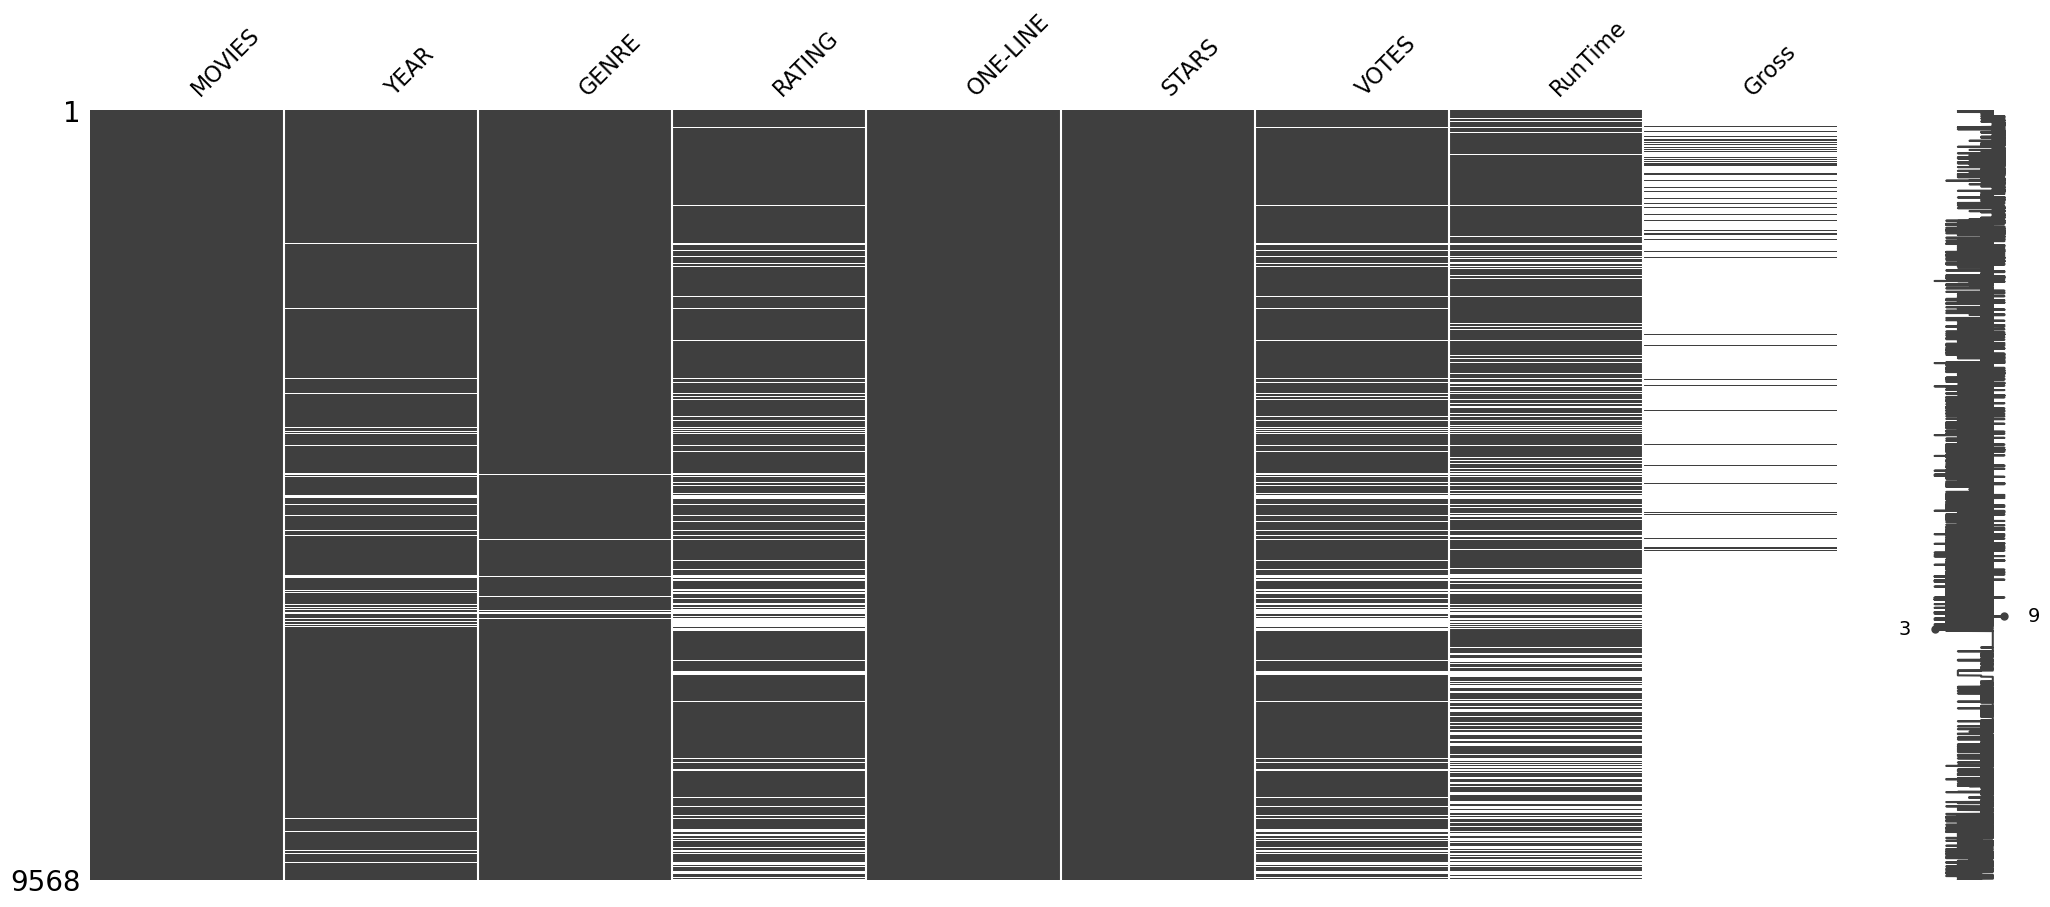

In [11]:
msno.matrix(df);

In [12]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9568   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %     ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ RATING           │   1400 │    14.63 │     6.92 │    1.22 │   1.1 │   6.2 │   7.1 │  7.8 │   9.9 │   ▂▆▇▁  │  │
│ │ RunTime          │   2560 │    26.76 │    68.87 │   47.28 │     1 │    37 │    60 │   95 │   853 │    ▇    │  │
│ └──────────────────┴────────┴──────────┴──────────┴─────────┴───────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ MOVIES                   │          0 │            0 │                        3.3 │                  31493 │  │
│ │ YEAR                     │        542 │         5.66 │                        1.4 │                  13450 │  │
│ │ GENRE                    │         78 │         0.82 │                         14 │                 135144 │  │
│ │ ONE-LINE                 │          0 │            0 │                         25 │                 242532 │  │
│ │ STARS                    │          0 │            0 │                         19 │                 182105 │  │
│ │ VOTES                    │       1400 │        14.63 │                       0.85 │                   8168 │  │
│ │ Gross                    │       9108 │        95.19 │                      0.048 │                    460 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<a id='organizing-columns'></a>
# <font color='firebrick'> <b>Organizing Columns</b><font color='black'> 

In [13]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [14]:
df.columns = df.columns.str.lower().str.replace('-', '_')
df.columns

Index(['movies', 'year', 'genre', 'rating', 'one_line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')

In [15]:
# for this project one_line column won't be used because of that let's drop the one_line column.
df.drop(columns=['one_line'], inplace= True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movies   9568 non-null   object 
 1   year     9026 non-null   object 
 2   genre    9490 non-null   object 
 3   rating   8168 non-null   float64
 4   stars    9568 non-null   object 
 5   votes    8168 non-null   object 
 6   runtime  7008 non-null   float64
 7   gross    460 non-null    object 
dtypes: float64(2), object(6)
memory usage: 672.8+ KB


## <font color='indianred'> <b>movies Column</b><font color='black'> 

In [17]:
df["movies"] = df["movies"].str.strip()

## <font color='indianred'> <b>year Column</b><font color='black'> 

In [18]:
df["year"] = df["year"].str.strip()

In [19]:
df.year.unique()

array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

In this column there are some values include (), -, TV Special, TV Movie and roman numerals. Let's remove these things.

In [20]:
df["year"] = df['year'].str.replace(r'[\(\)]', '', regex=True)

In [21]:
df["year"] = df['year'].str.replace('\u2013', '-', regex=False).str.split('-').str[0]

In [22]:
df['year'] = df['year'].replace(to_replace=r'\b(I|II|III|IV|V|VI|VII|VIII|IX|X|XI|XII|XIII|XXIII|XLI|XIV)\b', value='', regex=True)

In [23]:
df['year'] = df['year'].replace(to_replace=r'(TV Special|TV Movie|Video|TV Short|Game)', value='', regex=True).str.strip()

In [24]:
df['year'] = df['year'].replace("", np.nan)

In [25]:
df.year.unique()

array(['2021', '2010', '2013', '2020', '2006', '2019', '2016', '2011',
       '2005', '2008', '2017', '1994', '2014', '2015', '2003', '2009',
       '2018', '1987', '2012', '2007', '2000', '1993', '1999', '2001',
       '1997', '1989', '1975', '1995', '1984', '1998', '1966', '1990',
       '2002', '1976', '1978', '2022', '1982', '1968', '2004', '1996',
       '1971', '1980', '1962', '1991', '1960', '1988', '1969', '1961',
       '1979', '1956', '1983', nan, '1986', '1967', '1974', '1992',
       '1958', '1932', '1941', '1950', '1946', '1981', '1952', '1957',
       '1954', '1955', '1948', '1947', '1977', '2023', '1945', '1953',
       '1985', '1973', '1972', '1965', '1944', '1933', '1938'],
      dtype=object)

Some rows had values ​​like **2010-2015**. The reason why we separate it with a - sign and take the first value is to treat this column as **release_year**. In this way, a better visualization can be achieved.

In [26]:
df = df.rename(columns={'year': 'release_year'})

## <font color='indianred'> <b>genre Column</b><font color='black'> 

In [27]:
df.genre.unique()

array(['\r\nAction, Horror, Thriller            ',
       '\r\nAnimation, Action, Adventure            ',
       '\r\nDrama, Horror, Thriller            ',
       '\r\nAnimation, Adventure, Comedy            ',
       '\r\nAction, Crime, Horror            ',
       '\r\nAction, Crime, Drama            ',
       '\r\nDrama, Romance            ',
       '\r\nCrime, Drama, Mystery            ', '\r\nComedy            ',
       '\r\nAction, Adventure, Thriller            ',
       '\r\nCrime, Drama, Fantasy            ',
       '\r\nDrama, Horror, Mystery            ',
       '\r\nComedy, Drama, Romance            ',
       '\r\nCrime, Drama, Thriller            ', '\r\nDrama            ',
       '\r\nComedy, Drama            ',
       '\r\nDrama, Fantasy, Horror            ',
       '\r\nComedy, Romance            ',
       '\r\nAction, Adventure, Drama            ',
       '\r\nCrime, Drama            ',
       '\r\nDrama, History, Romance            ',
       '\r\nHorror, Mystery       

In [28]:
df["genre"] = df["genre"].str.strip()

## <font color='indianred'> <b>rating Column</b><font color='black'> 

In [29]:
df.rating.unique()

array([6.1, 5. , 8.2, 9.2, nan, 7.6, 6.8, 8.6, 7.9, 7.4, 6. , 8.1, 6.2,
       5.4, 8. , 7.5, 9.4, 8.3, 8.7, 8.9, 8.8, 8.5, 8.4, 6.7, 7.7, 9. ,
       5.8, 3.3, 7.8, 5.7, 6.6, 6.9, 6.5, 7.1, 5.6, 7.3, 9.1, 7.2, 6.4,
       9.3, 7. , 6.3, 3.7, 5.5, 4.6, 4.8, 5.3, 4.7, 5.9, 5.1, 4.9, 2.7,
       4.4, 3.1, 4.5, 4.2, 3.8, 5.2, 2.8, 3.5, 4.3, 3.2, 1.1, 3.9, 4. ,
       3.4, 2.6, 3.6, 3. , 2.5, 2.2, 2.9, 4.1, 2.1, 2. , 2.3, 2.4, 1.8,
       9.6, 9.5, 9.7, 9.9, 9.8])

**rating** column seems OK for now. Let's continue with other columns.

## <font color='indianred'> <b>stars Column</b><font color='black'> 

In [30]:
df["stars"].str.strip()

0       Director:\r\nPeter Thorwarth\r\n| \r\n    Star...
1       Stars:\r\nChris Wood, \r\nSarah Michelle Gella...
2       Stars:\r\nAndrew Lincoln, \r\nNorman Reedus, \...
3       Stars:\r\nJustin Roiland, \r\nChris Parnell, \...
4       Director:\r\nMatthias Schweighöfer\r\n| \r\n  ...
                              ...                        
9993    Director:\r\nNicolai Rohde\r\n| \r\n    Stars:...
9995                                                     
9996    Director:\r\nOrlando von Einsiedel\r\n| \r\n  ...
9997    Director:\r\nJovanka Vuckovic\r\n| \r\n    Sta...
9998    Director:\r\nJovanka Vuckovic\r\n| \r\n    Sta...
Name: stars, Length: 9568, dtype: object

In [31]:
# removing unnecessary values as \r, \n etc.
df['stars'] = df['stars'].str.replace('\r', '', regex=False).str.replace('\n', '', regex=False).str.replace('    ', '', regex=False)

In [32]:
df[['part1', 'part2']] = df['stars'].str.split('|', expand=True)

In [33]:
# Let's clear the columns to remove the 'Director:' and 'Stars:' tags
df['director'] = df['part1'].str.replace('Director:', '', regex=False)
df['actors'] = df['part2'].str.replace('Stars:', '', regex=False).str.strip()

In [34]:
# If there are values ​​starting with Stars: in the director column,
# move that value to the actors column and replace the director column with an empty string
df.loc[df['director'].str.startswith('Stars:'), 'actors'] = df['director'].str.replace('Stars:', '', regex=False).str.strip()
df.loc[df['director'].str.startswith('Stars:'), 'director'] = ''

In [35]:
df['actors'] = df['actors'].str.replace('Stars:', '', regex=False).str.replace('Star:', '', regex=False).str.strip()
df['director'] = df['director'].str.replace('Directors:', '', regex=False).str.strip()
df['director'] = df['director'].replace("", np.nan)

In [36]:
# dropping unnecessary columns
df = df.drop(columns=['stars', 'part1', 'part2'])

In [37]:
df.sample(5)

,movies,release_year,genre,rating,votes,runtime,gross,director,actors
597,Hell on Wheels,2011,"Drama, Western",8.3,"48,854",42.0,NaN,NaN,"Anson Mount, Colm Meaney, Robin McLeavy, Phil ..."
1545,Zoe,2018,"Romance, Sci-Fi",6.1,"8,146",104.0,NaN,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Rashid..."
5332,Anitta: Made in Honório,2020,"Documentary, Biography, Music",7.0,351,NaN,NaN,NaN,"Anitta, Arielle Macedo, David Brazil, Felipe B..."
1127,Dogs of Berlin,2018,"Action, Crime, Drama",7.6,"11,304",542.0,NaN,NaN,"Felix Kramer, Fahri Yardim, Samy Abdel Fattah,..."
5023,My Wife and I Bought A Ranch...,NaN,Horror,NaN,NaN,NaN,NaN,NaN,None


## <font color='indianred'> <b>votes Column</b><font color='black'> 

In [38]:
# Removing the thousands separator comma (,)
df['votes'] = df['votes'].str.replace(',', '', regex=False)

In [39]:
# changing the dtype of the column
df['votes'] = df['votes'].astype(float)

Could not change the dtype of the column to **int** because it contains NaN values. After performing operations on NaN values, dtype can be converted to int.

## <font color='indianred'> <b>runtime Column</b><font color='black'> 

In [40]:
df.runtime.unique()

array([121.,  25.,  44.,  23.,  nan,  50., 110.,  53.,  30., 114.,  42.,
       107.,  60.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,
        58.,  24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,
        31., 104., 127.,  54.,  92.,  88.,  59.,  55., 178.,  16.,  48.,
        99., 124., 151., 100.,  40., 149., 119.,  20.,  87., 111.,  91.,
       117., 135., 129., 113.,  15.,  85., 169.,  97., 116., 138., 137.,
       209., 201., 123.,  96., 572., 467., 140.,  56., 112., 125., 145.,
       128., 147.,  90.,  98.,  26., 115., 156., 179., 108.,  34.,  11.,
       152.,  94., 133., 298.,  28., 126., 102., 106., 385., 122., 452.,
       120., 494., 240., 134.,  80.,  89.,  35., 216., 296., 143., 164.,
       386., 363., 150., 105., 131.,  65., 103.,  86.,  52., 356., 154.,
       130., 491., 132.,  93.,  82., 370.,  18., 228.,  84., 280.,  78.,
       316., 264.,  83.,  81., 270., 197., 347., 267.,  37., 230., 233.,
        21., 220., 331.,  39.,   9., 281.,  10., 55

**runtime** column seem OK for now.

## <font color='indianred'> <b>gross Column</b><font color='black'> 

In [41]:
df.gross.unique()

array([nan, '$75.47M', '$402.45M', '$89.22M', '$315.54M', '$57.01M',
       '$260.00M', '$132.38M', '$167.77M', '$404.52M', '$15.07M',
       '$70.10M', '$210.61M', '$327.48M', '$390.53M', '$303.00M',
       '$56.63M', '$58.06M', '$353.01M', '$46.89M', '$7.00M', '$377.85M',
       '$107.83M', '$403.71M', '$316.83M', '$100.55M', '$28.26M',
       '$188.76M', '$213.52M', '$226.01M', '$408.08M', '$10.06M',
       '$14.84M', '$168.05M', '$183.64M', '$342.55M', '$96.52M',
       '$140.22M', '$172.56M', '$56.95M', '$330.36M', '$17.80M', '$0.20M',
       '$56.82M', '$66.21M', '$75.61M', '$4.56M', '$106.58M', '$5.02M',
       '$22.68M', '$102.92M', '$110.52M', '$504.01M', '$26.86M', '$2.00M',
       '$32.73M', '$33.80M', '$400.74M', '$19.02M', '$36.26M', '$6.67M',
       '$45.51M', '$75.66M', '$0.33M', '$4.00M', '$20.16M', '$95.86M',
       '$176.48M', '$126.66M', '$80.10M', '$42.34M', '$0.04M', '$4.71M',
       '$117.72M', '$229.09M', '$33.70M', '$97.69M', '$21.15M', '$27.85M',
       '$25.02

In [42]:
df["gross"] = df["gross"].str.replace('$', '').str.replace('M', '')

In [43]:
df["gross"] = df["gross"].astype(float)

<a id='nan-values'></a>
# <font color='firebrick'> <b>NaN Values</b><font color='black'> 

In [44]:
df.isnull().sum()

movies             0
release_year     635
genre             78
rating          1400
votes           1400
runtime         2560
gross           9108
director        3264
actors           816
dtype: int64

## <font color='indianred'> <b>NaN Values in "release_year" Column</b><font color='black'> 

Filling Methods For **"release_year"** Column:

 - **Mode:** It may make sense to fill NaN values ​​in the release_year column with mode because year information can often have frequently recurring years within a certain range. This ensures that the year that occurs most frequently in your dataset better aligns with the rest of your dataset.
 - **Mean:** Since year information is continuous data, it is also possible to use the average. However, the average of years is often not a full year and this may not be meaningful for some years..

In [45]:
df.release_year.isnull().sum()

635

In [46]:
df.release_year.mode()[0]

'2020'

In [47]:
df["release_year"].fillna(df.release_year.mode()[0], inplace= True)

In [48]:
df.release_year.isnull().sum()

0

## <font color='indianred'> <b>NaN Values in "genre" Column</b><font color='black'> 

The NaN values in genre column can be randomly filled with top 10 genres.

In [49]:
top10_genres = df["genre"].str.split(", ", expand=True).stack().value_counts()[:10]
top10_genres

Drama          4115
Comedy         2736
Action         2110
Adventure      1588
Animation      1584
Crime          1519
Documentary    1221
Thriller        895
Mystery         840
Romance         835
Name: count, dtype: int64

In [50]:
top10_genre_list = top10_genres.index.tolist()
top10_genre_list

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Animation',
 'Crime',
 'Documentary',
 'Thriller',
 'Mystery',
 'Romance']

In [51]:
# randomly filling NaN values
df['genre'] = df['genre'].apply(lambda x: ', '.join(np.random.choice(top10_genre_list, size=1)) if pd.isna(x) else x)

In [52]:
df.genre.isnull().sum()

0

In [53]:
df["genre"].str.split(", ", expand=True).stack().value_counts()

Drama          4124
Comedy         2747
Action         2116
Adventure      1595
Animation      1592
Crime          1524
Documentary    1232
Thriller        898
Mystery         851
Romance         842
Fantasy         537
Horror          518
Family          442
Reality-TV      370
History         346
Biography       311
Sci-Fi          303
Short           247
Music           200
Sport           192
Game-Show        98
Talk-Show        89
Musical          61
War              48
Western          24
News             23
Film-Noir        12
Name: count, dtype: int64

Since the filling process was done **randomly using the top 10 genres**, there was no excessive variation in the number of values.

## <font color='indianred'> <b>NaN Values in "rating" Column</b><font color='black'> 

In [54]:
df.rating.mode()[0]

7.2

In [55]:
df["rating"] = df["rating"].fillna(df.rating.mode()[0])

In [56]:
df.rating.isnull().sum()

0

## <font color='indianred'> <b>NaN Values in "votes" Column</b><font color='black'> 

Filling Methods For **"votes"** Column:
 - **Mean:** It usually makes more sense to fill the NaN values ​​in the vote column with the mean because, in numerical data, the mean is an effective method to reflect the central tendency of the data.
 - **Mode:** One could also consider filling with the most frequently used value, but this method is not very common for continuous data like vote because the data is usually concentrated around the mean rather than the mode..

In [57]:
df.votes.isnull().sum()

1400

In [58]:
# Since the number of votes will not be in decimal form, converting it to integer form using round
df.votes.mean().round(0)

15144.0

In [59]:
df["votes"].fillna(df.votes.mean().round(0), inplace= True)

In [60]:
df.votes.isnull().sum()

0

## <font color='indianred'> <b>NaN Values in "runtime" Column</b><font color='black'> 

In [61]:
df.runtime.mean().round(2)

68.87

In [62]:
mean_runtime_by_genre = df.groupby('genre')['runtime'].transform('mean')

In [63]:
df['runtime'].fillna(mean_runtime_by_genre, inplace= True)

In [64]:
df.runtime.isnull().sum()

38

In [65]:
df['runtime'].fillna(df.runtime.mean().round(2), inplace= True)

In [66]:
df.runtime.isnull().sum()

0

## <font color='indianred'> <b>NaN Values in "gross" Column</b><font color='black'> 

In [67]:
df.gross.isnull().sum()

9108

In [68]:
df.gross.isnull().sum() / len(df) * 100

95.1923076923077

**95% of the gross column consists of NaN values.**

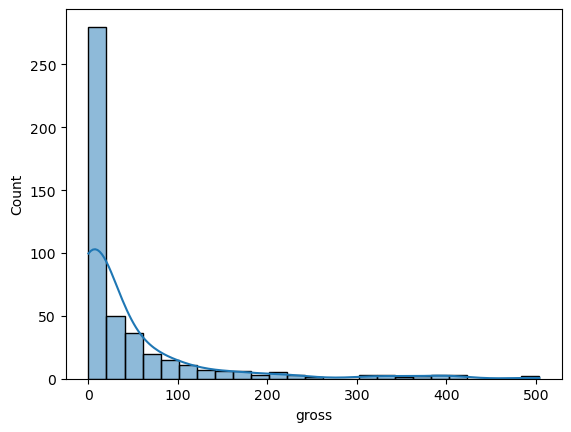

In [69]:
sns.histplot(df.gross, bins= 25, kde= True);

A column with a right-skewed distribution generally indicates that most values ​​are low but there are a few high values.

The **median** is a more reliable measure of central tendency **than the mean** in **right-skewed distributions**. The median is not affected by outliers and often provides a more representative value.

In [70]:
df.gross.mode()[0]

0.01

In [71]:
df.gross.fillna(df.gross.mode()[0], inplace=True)

In [72]:
df.gross.isnull().sum()

0

## <font color='indianred'> <b>NaN Values in "director" and "actors" Columns</b><font color='black'> 

In [73]:
df["director"].fillna("Unknown", inplace= True)

In [74]:
df["actors"].fillna("Unknown", inplace= True)

In [75]:
df.isnull().sum()

movies          0
release_year    0
genre           0
rating          0
votes           0
runtime         0
gross           0
director        0
actors          0
dtype: int64

In [76]:
df.sample(5)

,movies,release_year,genre,rating,votes,runtime,gross,director,actors
7856,She-Ra and the Princesses of Power,2018,"Animation, Action, Adventure",8.3,898.0,24.0,0.01,Christina Manrique,"Aimee Carrero, Karen Fukuhara, AJ Michalka, Ma..."
1093,Move to Heaven,2021,Drama,8.7,2598.0,60.0,0.01,Unknown,"Olivia Castanho, Yang Hong-Seok, Lee Jehoon, T..."
6749,Warrior Nun,2020,"Action, Drama, Fantasy",7.6,740.0,39.0,0.01,Mathias Herndl,"Alba Baptista, Toya Turner, Thekla Reuten, Lor..."
3606,Best. Worst. Weekend. Ever.,2018,"Comedy, Family",6.4,254.0,191.0,0.01,Unknown,"Sam Ashe Arnold, Brittany Garms, Brianna Reed,..."
6727,The Order,2019,"Drama, Fantasy, Horror",7.3,375.0,47.0,0.01,Leslie Hope,"Jake Manley, Sarah Grey, Matt Frewer, Louriza ..."


In [77]:
# changing dtypes of some columns
df["release_year"] = df["release_year"].astype(int)
df["votes"] = df["votes"].astype(int)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movies        9568 non-null   object 
 1   release_year  9568 non-null   int32  
 2   genre         9568 non-null   object 
 3   rating        9568 non-null   float64
 4   votes         9568 non-null   int32  
 5   runtime       9568 non-null   float64
 6   gross         9568 non-null   float64
 7   director      9568 non-null   object 
 8   actors        9568 non-null   object 
dtypes: float64(3), int32(2), object(4)
memory usage: 930.8+ KB


In [79]:
# Saving the final (edited) version of data set as a csv file
# df.to_csv("movies_edited.csv", index= False)

<a id='data-visualization'></a>
# <font color='firebrick'> <b>Data Visualization</b><font color='black'> 

## <font color='indianred'> <b>Movie Distribution by Years</b><font color='black'> 

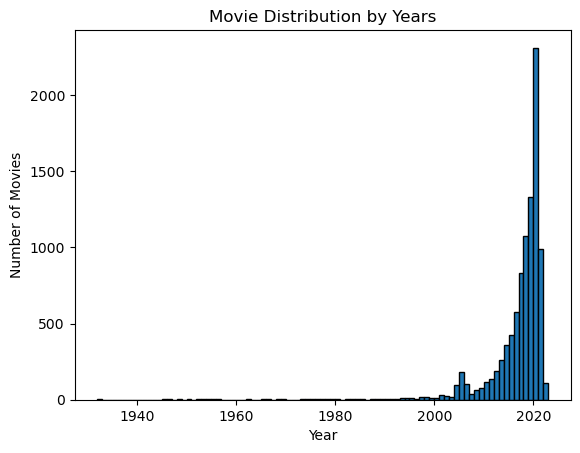

In [80]:
df['release_year'].plot(kind='hist', bins=range(df['release_year'].min(), df['release_year'].max() + 1), edgecolor='black')
plt.title('Movie Distribution by Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

This graph shows that more films were released in the 21st century.

## <font color='indianred'> <b>Distribution of Movie Genres</b><font color='black'> 

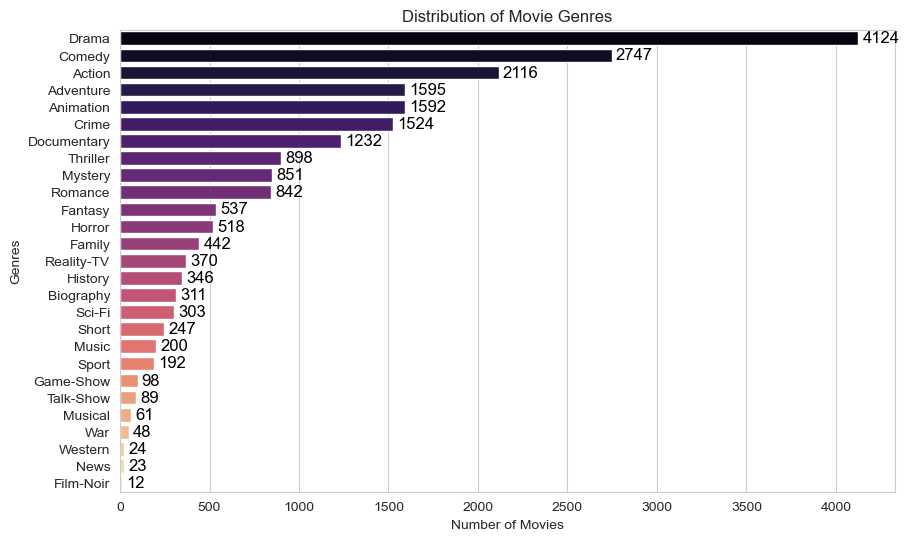

In [81]:
genre_counts = df['genre'].str.split(', ', expand=True).stack().value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
ax.set(xlabel='Number of Movies', ylabel='Genres')
plt.title("Distribution of Movie Genres")
plt.show()

In [82]:
genre_counts = df['genre'].str.split(', ', expand=True).stack().value_counts()
genre_ratio = genre_counts / len(df) * 100
genre_ratio

Drama          43.102007
Comedy         28.710284
Action         22.115385
Adventure      16.670151
Animation      16.638796
Crime          15.928094
Documentary    12.876254
Thriller        9.385452
Mystery         8.894231
Romance         8.800167
Fantasy         5.612458
Horror          5.413880
Family          4.619565
Reality-TV      3.867057
History         3.616221
Biography       3.250418
Sci-Fi          3.166806
Short           2.581522
Music           2.090301
Sport           2.006689
Game-Show       1.024247
Talk-Show       0.930184
Musical         0.637542
War             0.501672
Western         0.250836
News            0.240385
Film-Noir       0.125418
Name: count, dtype: float64

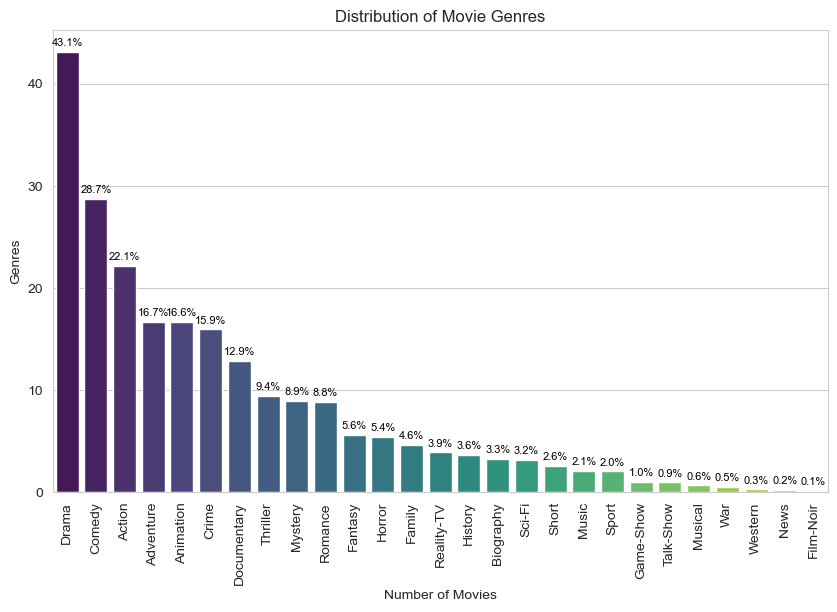

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=genre_ratio.index, y=genre_ratio.values, palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='edge', fontsize=8, color='black', padding=3)
    
ax.set(xlabel='Number of Movies', ylabel='Genres')
plt.title("Distribution of Movie Genres")
plt.xticks(rotation=90)
plt.show()

When we look at the distribution graphs of movie genres, it is observed that **drama movies** constitute **43%** of the data set.

## <font color='indianred'> <b>Distribution of the 10 Most Released Genres</b><font color='black'> 

In [84]:
top10_genres = df['genre'].str.split(', ', expand=True).stack().value_counts()[:10]
top10_genres

Drama          4124
Comedy         2747
Action         2116
Adventure      1595
Animation      1592
Crime          1524
Documentary    1232
Thriller        898
Mystery         851
Romance         842
Name: count, dtype: int64

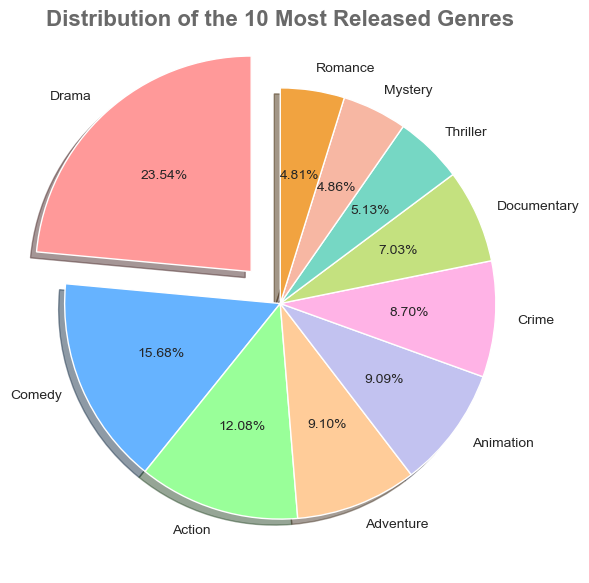

In [85]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(top10_genres.values, labels=top10_genres.index,
       autopct='%1.2f%%',
       startangle=90,
       shadow= 0.3,
       colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76d7c4', '#f7b7a3', '#f1a340'],
       explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
      )

ax.set_title('Distribution of the 10 Most Released Genres', fontsize=16, fontweight='bold', color= 'dimgrey')

plt.show()

## <font color='indianred'> <b>Top 10 Directors Who Directed the Most Movies</b><font color='black'> 

In [86]:
# top 10 directors
director_counts = df['director'].str.split(', ', expand=True).stack().value_counts()[1:11]
director_counts

Noriyuki Abe       66
Adam Heydt         28
Shinji Aramaki     25
Kenji Kamiyama     24
Brian Smith        21
Oliver Driver      21
Giancarlo Volpe    19
Roy Burdine        17
Manolo Caro        17
Jay Karas          17
Name: count, dtype: int64

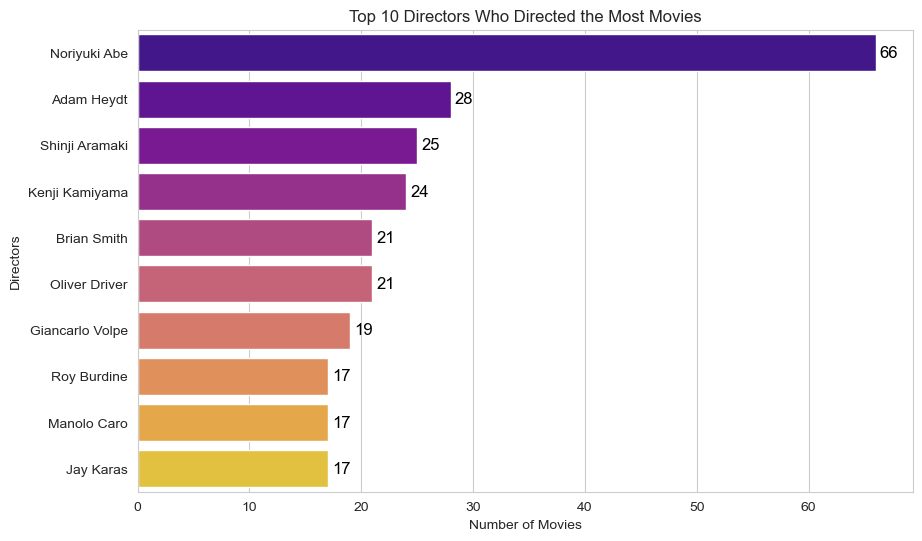

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=director_counts.values, y=director_counts.index, palette="plasma")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
ax.set(xlabel='Number of Movies', ylabel='Directors')
plt.title("Top 10 Directors Who Directed the Most Movies")
plt.show()

## <font color='indianred'> <b>Top 10 Actors Who Acted In The Most Movies</b><font color='black'> 

In [88]:
actor_counts = df['director'].str.split(', ', expand=True).stack().value_counts()[1:11]
actor_counts

Noriyuki Abe       66
Adam Heydt         28
Shinji Aramaki     25
Kenji Kamiyama     24
Brian Smith        21
Oliver Driver      21
Giancarlo Volpe    19
Roy Burdine        17
Manolo Caro        17
Jay Karas          17
Name: count, dtype: int64

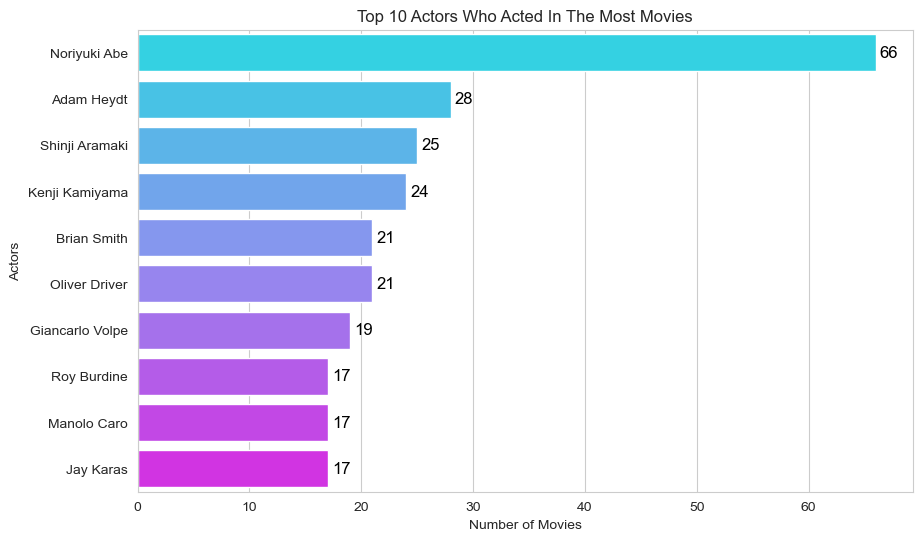

In [89]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="cool")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
ax.set(xlabel='Number of Movies', ylabel='Actors')
plt.title("Top 10 Actors Who Acted In The Most Movies")
plt.show()

## <font color='indianred'> <b>Relationship Between Ratings and Number of Votes</b><font color='black'> 

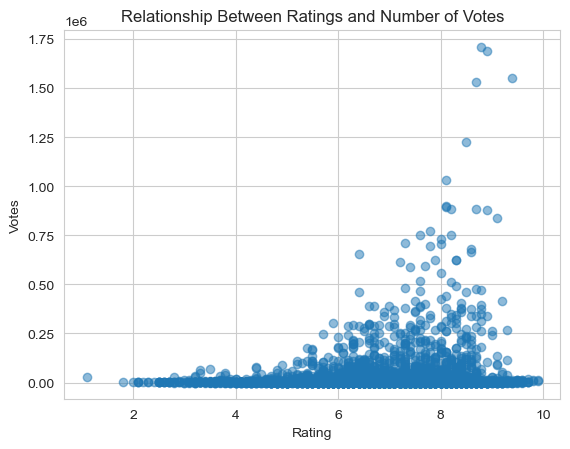

In [90]:
plt.scatter(df['rating'], df['votes'], alpha=0.5)
plt.title('Relationship Between Ratings and Number of Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

Relationship Between Rating and Votes:
 - For movies with low ratings (between 2-4) the number of votes is usually very low.
 - As the rating increases above 6, there is a significant increase in the number of votes.
 - The movies with the highest number of votes are usually movies rated around 8.d 8.

The chart shows a concentration of high ratings (8-10) and mid-range vote counts (between 100,000-500,000). This can often mean that more popular and acclaimed movies receive more votes.

**This chart shows that popular movies generally tend to be rated better, and as a result, they tend to be rated by more people.**

## <font color='indianred'> <b>Movies Data Set Correlation</b><font color='black'> 

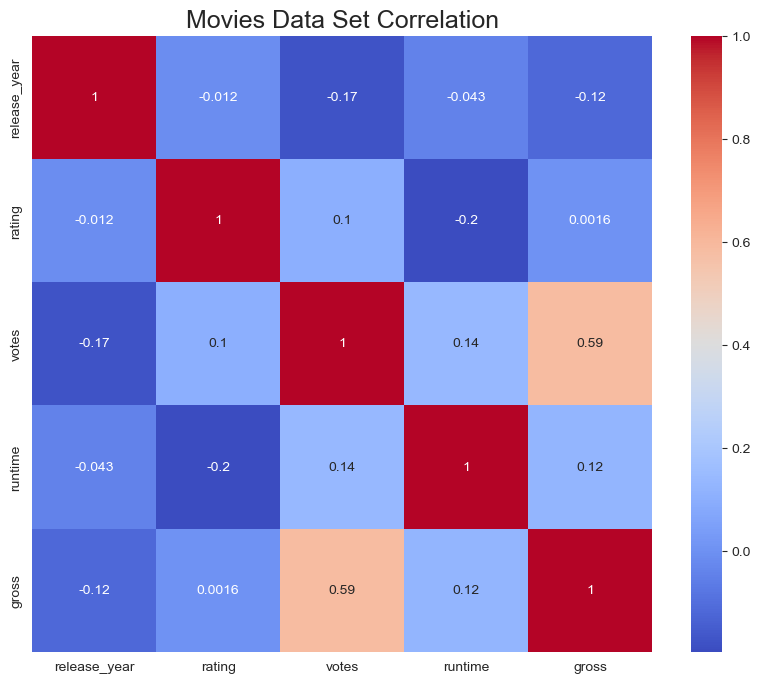

In [91]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(exclude="object")

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Movies Data Set Correlation', fontsize=18)
plt.show()

The correlation matrix allows analyzing the relationships between numerical columns in the data set.
 - **Positive correlation (close to +1):** Two variables increase together (e.g., when one variable increases, the other also increases).
 - **Negative correlation (close to -1)**: As one variable increases, the other decreases (inverse relationship)
 - **No correlation (around 0**): There is no significant relationship between two variables.

**There is a positive correlation between the variables votes and gross (0.59). This means that movies with more ratings generally generate more revenue. Logically, popular movies receive more ratings, which can contribute to their higher revenue.**

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>